*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Strategic Thinking
*Assessment Title: CA 2 Capstone Report
*Assessment Due Date: 16 April 2024 
*Date of Submission: 19 May 2024

# Discovery

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## Reading the Data

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('housing.csv', encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_30084\1655641777.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
143890,https://bj.lianjia.com/chengjiao/BJCY86292346....,BJCY86292346,116.423442,39.994638,1111027375395,2013-10-21,NaN,2,270.0,46005,...,1.0,1996,1,6,0.250,1.0,1.0,1.0,7,72315.0
218954,https://bj.lianjia.com/chengjiao/BJFS90565582....,BJFS90565582,116.224012,39.763726,1111053458322,2015-10-26,NaN,4,195.0,24075,...,3.0,2012,4,6,0.500,1.0,0.0,1.0,5,38758.0
106170,https://bj.lianjia.com/chengjiao/BJCP88558645....,BJCP88558645,116.373628,40.094838,1111027377946,2015-03-01,NaN,12,215.0,17336,...,4.0,2007,1,2,0.500,0.0,1.0,1.0,6,37382.0
161474,https://bj.lianjia.com/chengjiao/BJCY88763612....,BJCY88763612,116.414421,40.053513,1111027378407,2015-03-08,NaN,1,218.0,23219,...,3.0,2007,4,6,0.500,1.0,0.0,1.0,7,34875.0
114242,https://bj.lianjia.com/chengjiao/BJCP91032887....,BJCP91032887,116.357513,40.071100,1111027380996,2015-12-29,1.0,8,295.5,41620,...,1.0,2003,4,6,0.375,1.0,1.0,1.0,8,52390.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 143890 to 184692
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32058 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null

In [5]:
data.shape

(63770, 26)

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,32058.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.000000,63336.000000,63770.000000,63770.000000,63770.000000,63758.000000,63758.000000,63758.000000,63770.000000,63683.000000
mean,116.418472,39.949347,1.148559e+12,29.115884,16.717798,347.798098,43513.610240,83.011276,0.994904,3.015743,2.609785,4.440411,0.381131,0.573042,0.647872,0.598780,6.759009,63573.609001
std,0.112404,0.091948,4.666619e+12,50.611048,33.759456,228.277709,21740.249716,37.296133,0.114863,1.267031,1.311985,1.904139,0.177229,0.494640,0.477637,0.490149,2.819104,22331.553933
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,7.300000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14773.000000
25%,116.345186,39.893200,1.111027e+12,1.000000,0.000000,203.500000,27974.000000,57.800000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46232.000000
50%,116.416888,39.934527,1.111027e+12,7.000000,5.000000,292.000000,38692.000000,73.855000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,58959.000000
75%,116.477730,40.002450,1.111027e+12,37.000000,18.000000,424.800000,53894.500000,98.330000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,75993.000000
max,116.732378,40.252758,1.114620e+15,965.000000,1000.000000,5500.000000,156250.000000,620.900000,4.000000,4.000000,4.000000,6.000000,3.333000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Data Preparation

Convert object columns to numeric:

In [7]:
extr = data["tradeTime"].str.extract(r"^(\d{4})", expand=False)

In [8]:
extr.head(10)

143890    2013
218954    2015
106170    2015
161474    2015
114242    2015
97077     2012
70334     2017
192475    2016
93300     2011
119414    2011
Name: tradeTime, dtype: object

In [9]:
data['tradeTime'] = pd.to_numeric(extr, errors='coerce')

In [10]:
extr = data["constructionTime"].str.extract(r"^(\d{4})", expand=False)

In [11]:
extr.head(10)

143890    1996
218954    2012
106170    2007
161474    2007
114242    2003
97077     2002
70334     2008
192475    1998
93300     2004
119414    2001
Name: constructionTime, dtype: object

In [12]:
data['constructionTime'] = pd.to_numeric(extr, errors='coerce')

In [13]:
data['livingRoom'] = pd.to_numeric(data['livingRoom'], errors='coerce')

In [14]:
data['drawingRoom'] = pd.to_numeric(data['drawingRoom'], errors='coerce')

In [15]:
data['bathRoom'] = pd.to_numeric(data['bathRoom'], errors='coerce')

In [16]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
143890,https://bj.lianjia.com/chengjiao/BJCY86292346....,BJCY86292346,116.423442,39.994638,1111027375395,2013,NaN,2,270.0,46005,...,1.0,1996.0,1,6,0.250,1.0,1.0,1.0,7,72315.0
218954,https://bj.lianjia.com/chengjiao/BJFS90565582....,BJFS90565582,116.224012,39.763726,1111053458322,2015,NaN,4,195.0,24075,...,3.0,2012.0,4,6,0.500,1.0,0.0,1.0,5,38758.0
106170,https://bj.lianjia.com/chengjiao/BJCP88558645....,BJCP88558645,116.373628,40.094838,1111027377946,2015,NaN,12,215.0,17336,...,4.0,2007.0,1,2,0.500,0.0,1.0,1.0,6,37382.0
161474,https://bj.lianjia.com/chengjiao/BJCY88763612....,BJCY88763612,116.414421,40.053513,1111027378407,2015,NaN,1,218.0,23219,...,3.0,2007.0,4,6,0.500,1.0,0.0,1.0,7,34875.0
114242,https://bj.lianjia.com/chengjiao/BJCP91032887....,BJCP91032887,116.357513,40.071100,1111027380996,2015,1.0,8,295.5,41620,...,1.0,2003.0,4,6,0.375,1.0,1.0,1.0,8,52390.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 143890 to 184692
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32058 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63758 non-null  float64
 12  drawingRoom          63758 non-null  float64
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63769 non-null  float64
 15  floor                63770 non-null

## Preprocesing the data

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [18]:
data.drop('url', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('floor', axis=1, inplace=True)

Dropping rows with missed prices (target variable)

In [19]:
data.dropna(subset=['price'], inplace=True)

In [20]:
missing_value_formats = ["?","NA","Na","NaN.",".NaN","NaN","nA","na","n.a","n.a.","Î´Öª",".n.a","n/a","nan","--","UnKnown"]
data.replace(missing_value_formats, float("NaN"), inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

## Calculate the number of missing values per variable

In [21]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

## Missing values graph

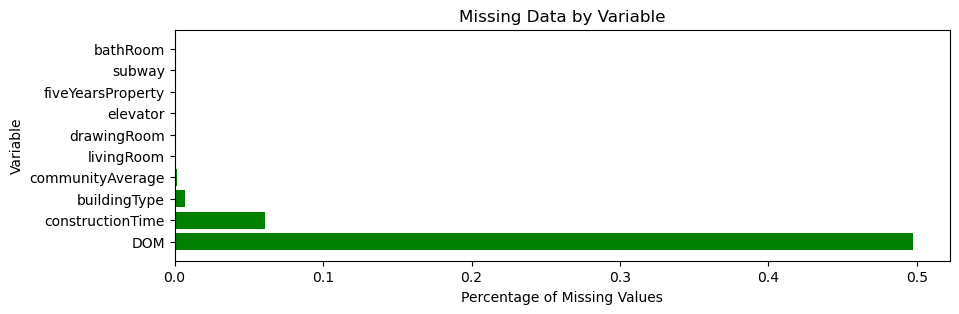

In [22]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [23]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,32058.000000,59879.000000,63336.000000,63683.000000
mean,29.115884,1999.212328,3.015743,63573.609001
std,50.611048,8.753911,1.267031,22331.553933
min,1.000000,1906.000000,0.250000,14773.000000
25%,1.000000,1994.000000,1.000000,46232.000000
50%,7.000000,2001.000000,4.000000,58959.000000
75%,37.000000,2006.000000,4.000000,75993.000000
max,965.000000,2016.000000,4.000000,183109.000000


Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [24]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

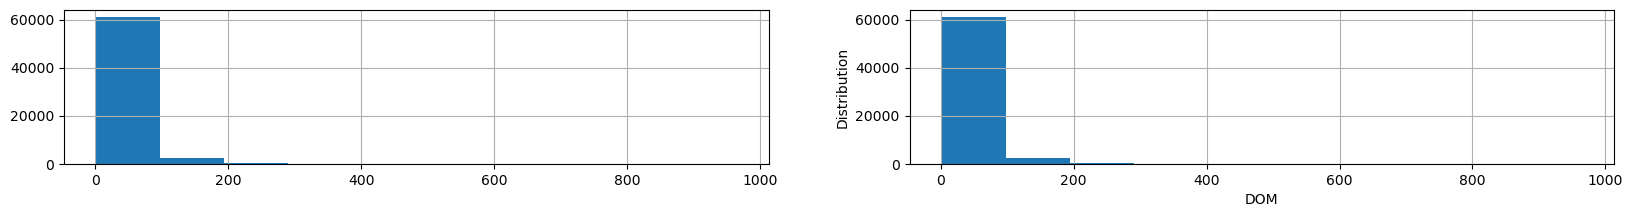

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

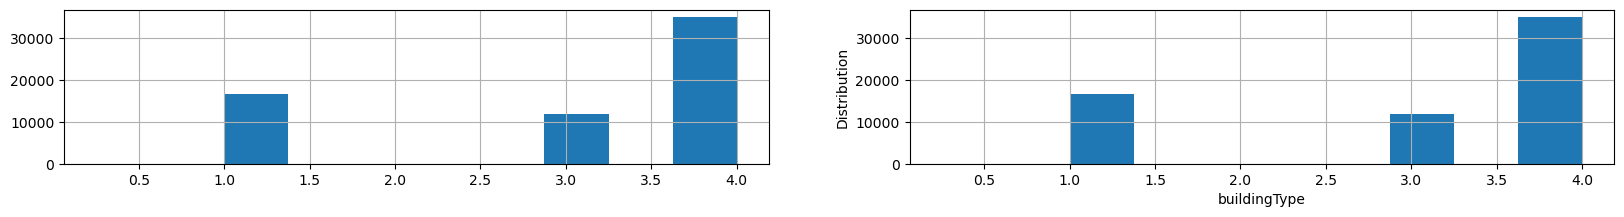

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

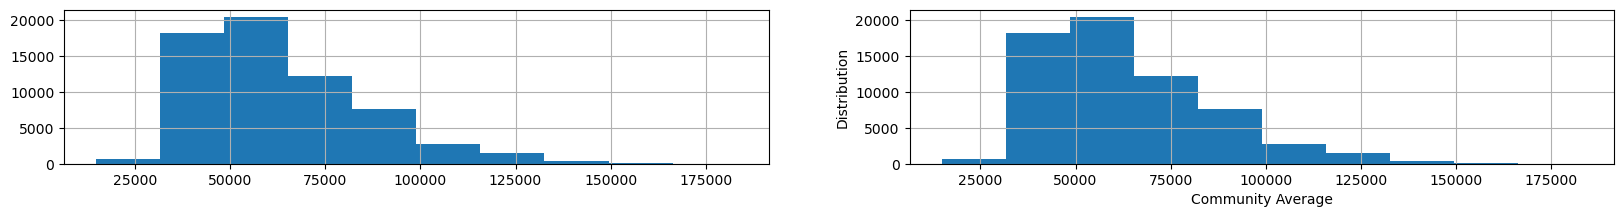

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

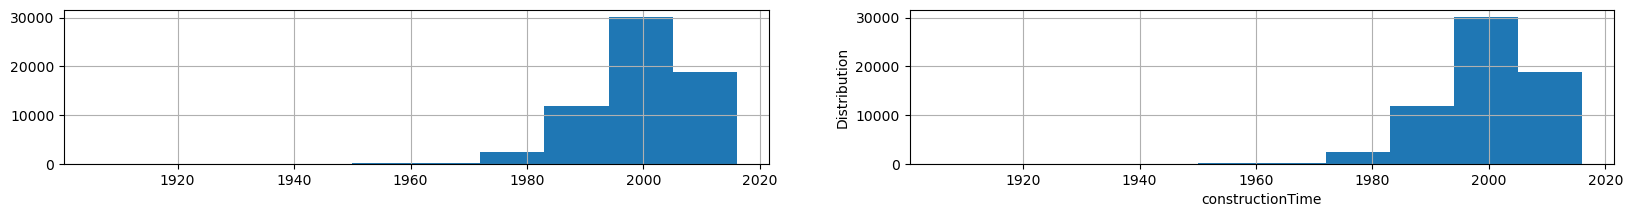

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

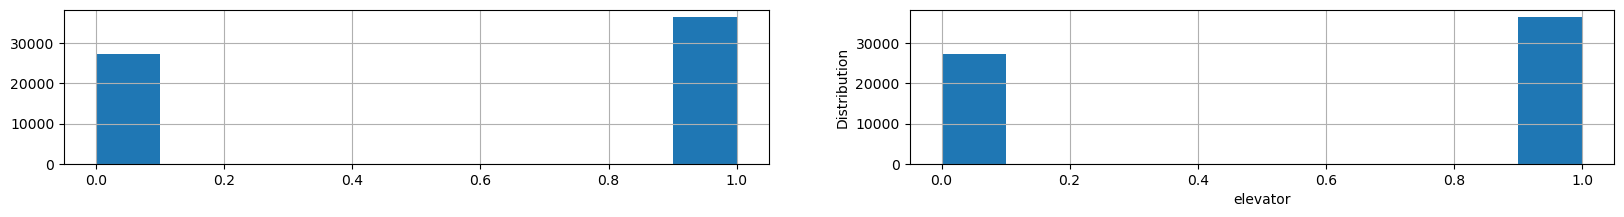

In [29]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

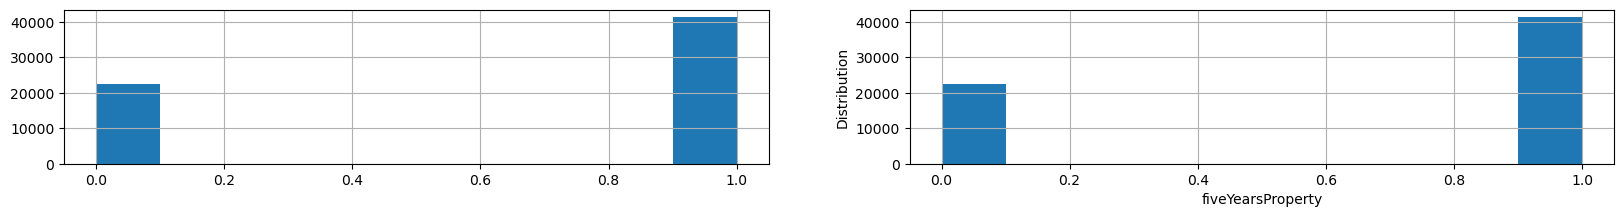

In [30]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

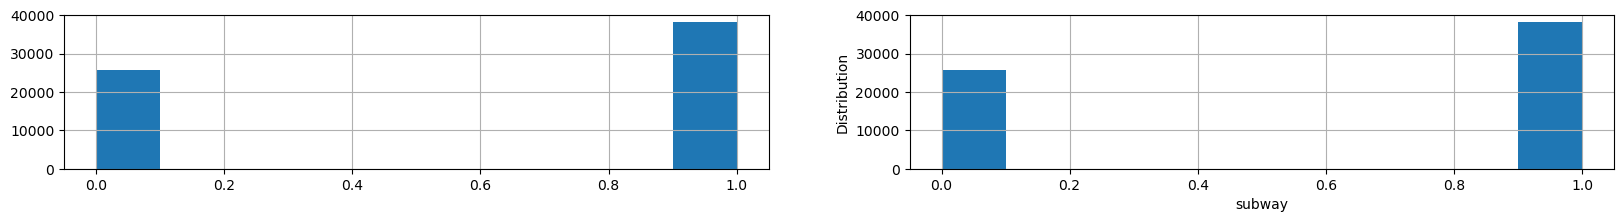

In [31]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

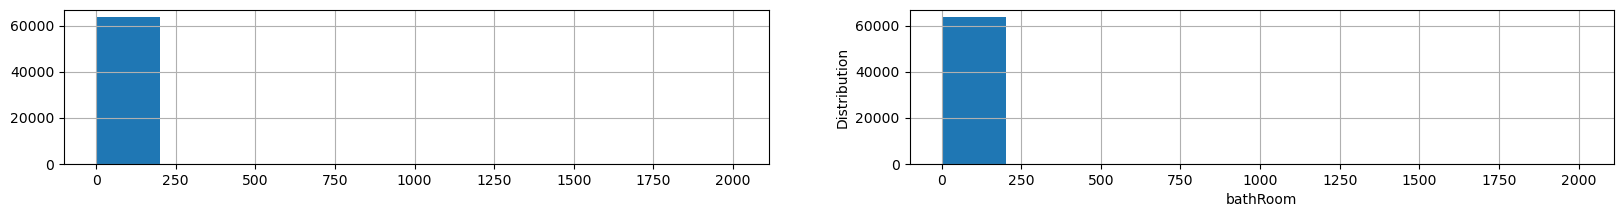

In [32]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

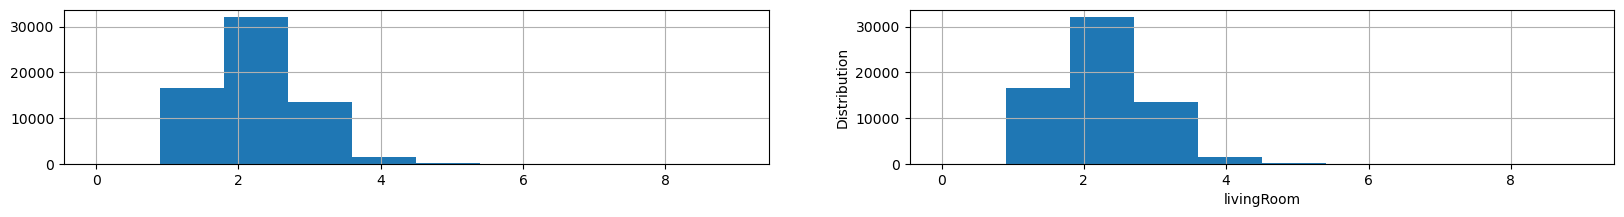

In [33]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

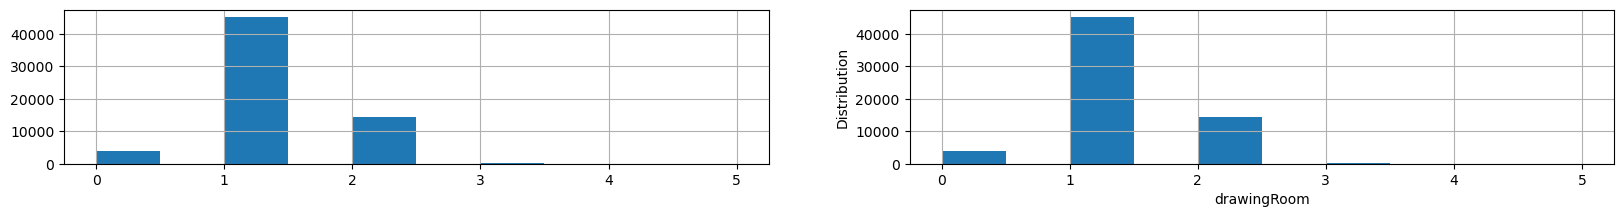

In [34]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be seen that the graphs do not show significant changes from one to the other, therefore the distributions remain constant.

Identifying which columns have missing values:

In [35]:
data.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 143890 to 184692
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  63770 non-null  float64
 1   Lat                  63770 non-null  float64
 2   Cid                  63770 non-null  int64  
 3   tradeTime            63770 non-null  int64  
 4   DOM                  63770 non-null  float64
 5   followers            63770 non-null  int64  
 6   totalPrice           63770 non-null  float64
 7   price                63770 non-null  int64  
 8   square               63770 non-null  float64
 9   livingRoom           63770 non-null  float64
 10  drawingRoom          63770 non-null  float64
 11  kitchen              63770 non-null  int64  
 12  bathRoom             63770 non-null  float64
 13  buildingType         63770 non-null  float64
 14  constructionTime     63770 non-null  float64
 15  renovationCondition  63770 non-null

## Data standardization

In [37]:
from sklearn import preprocessing

X = data.drop('price', axis=1)
y = data['price']

X_scaled = preprocessing.scale(X)

C:\Users\monte\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [38]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

## Visualising Data

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=1, errors='ignore')
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=0, errors='ignore')

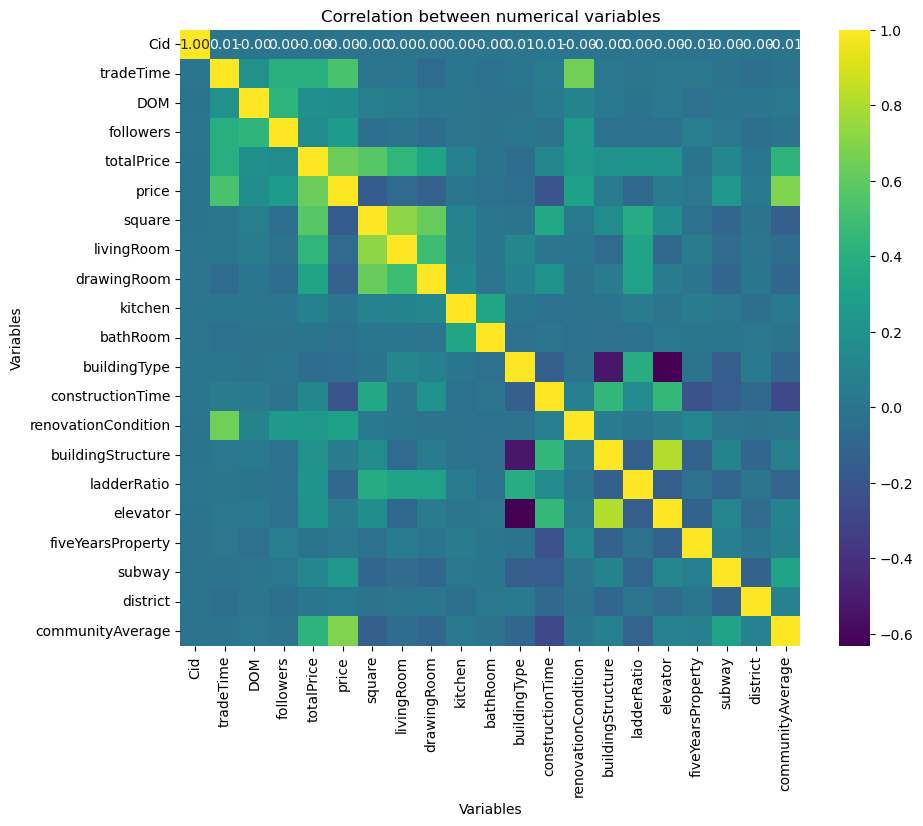

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation between numerical variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


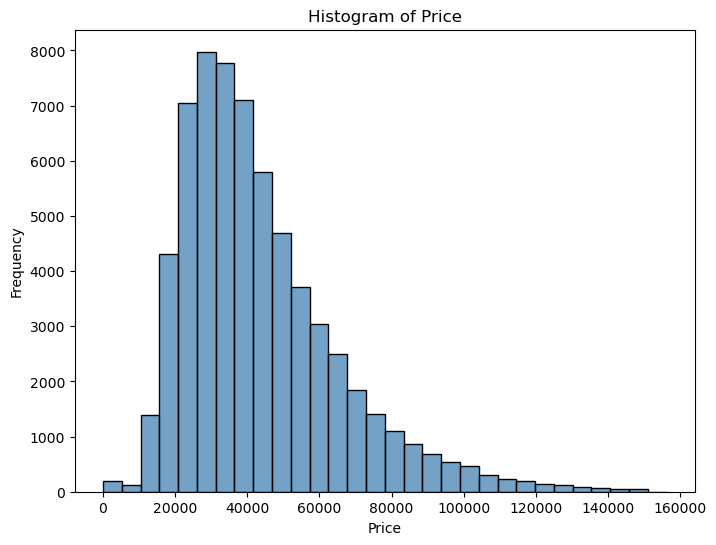

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', color='steelblue', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
quantiles_teoricos = np.random.normal(loc=0, scale=1, size=len(data['price']))
price_sorted = np.sort(data['price'])
quantiles = stats.norm.ppf(np.linspace(0, 1, len(price_sorted)))

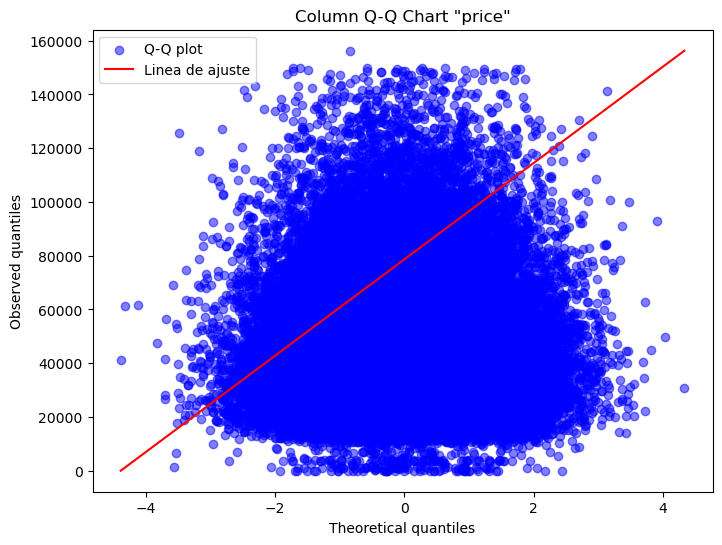

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_teoricos, price_sorted, color='blue', alpha=0.5, label='Q-Q plot')
plt.plot([np.min(quantiles_teoricos), np.max(quantiles_teoricos)], [np.min(price_sorted), np.max(price_sorted)], color='red', label='Linea de ajuste')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed quantiles')
plt.title('Column Q-Q Chart "price"')
plt.legend()
plt.show()

# Model Linear Regression

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [45]:
test_sizes = [0.2, 0.25, 0.3]
linear_scores = []

In [46]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=test_size, random_state=42)
    
    lm = LinearRegression()
    scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
    
    linear_scores.append(scores)

In [47]:
for i, size in enumerate(test_sizes):
    print(f"R2 score for LR on {size}: {np.mean(linear_scores[i])}")

R2 score for LR on 0.2: 0.8764175858149095
R2 score for LR on 0.25: 0.8765756995373725
R2 score for LR on 0.3: 0.8765712058486065


## Hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

### Hyperparameter tuning

### Linear Regretion

In [49]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_jobs': [50, 100, 150]}
    
lm = LinearRegression()

gs = GridSearchCV(lm, param_grid=param_grid, cv=5)

gs.fit(X_train_linear, y_train_linear)

lm_best_params = gs.best_params_
lm_best_score = gs.best_score_
best_estimator = gs.best_estimator_

print("Best params for LR: ", lm_best_params)
print("Best score: ", lm_best_score)

Best params for LR:  {'n_jobs': 50}
Best score:  0.8765712349624131


### Coefficients Calculation

In [50]:
print("Intercepto:", best_estimator.intercept_)
print("Coeficientes:", best_estimator.coef_)

Intercepto: -7729577.849255881
Coeficientes: [-5.93088220e+02  3.37731554e+03 -2.09858482e-11  3.89476913e+03
  6.94020856e+00  1.50237591e+01  6.31467105e+01 -2.84536962e+02
 -1.17647001e+01  1.14984938e+03 -1.54418380e+03  1.94824391e+00
 -1.30245236e+01 -7.67422040e+01 -9.03226336e+02 -3.16660642e+02
 -2.21593551e+03  7.66584677e+01 -1.22557006e+03  5.26192771e+02
 -3.36917652e+01  3.19227303e-01]


## Predictions

In [51]:
y_pred = best_estimator.predict(X_test_linear)

### RMSE and R^2

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred))
r2 = r2_score(y_test_linear, y_pred)

In [54]:
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 7624.492168824032
R^2: 0.8752232799547065


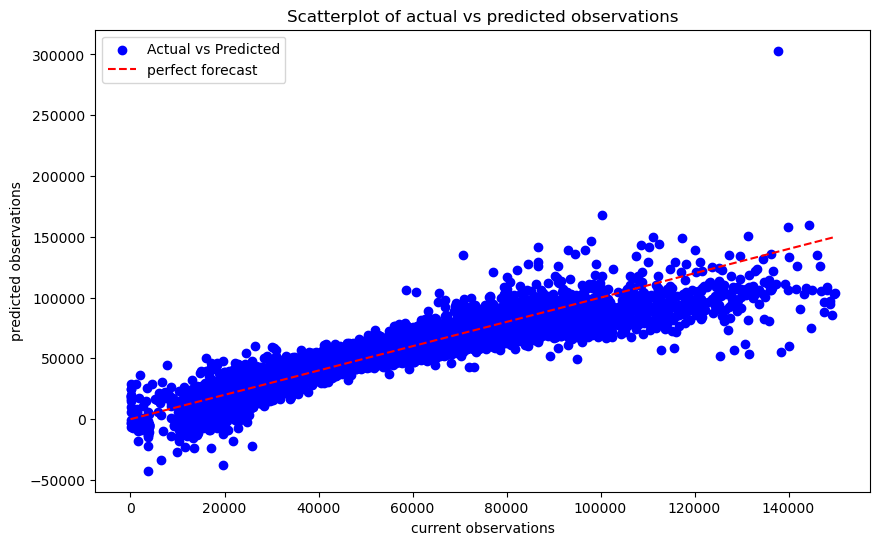

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='perfect forecast')

plt.title('Scatterplot of actual vs predicted observations')
plt.xlabel('current observations')
plt.ylabel('predicted observations')
plt.legend()
plt.show()

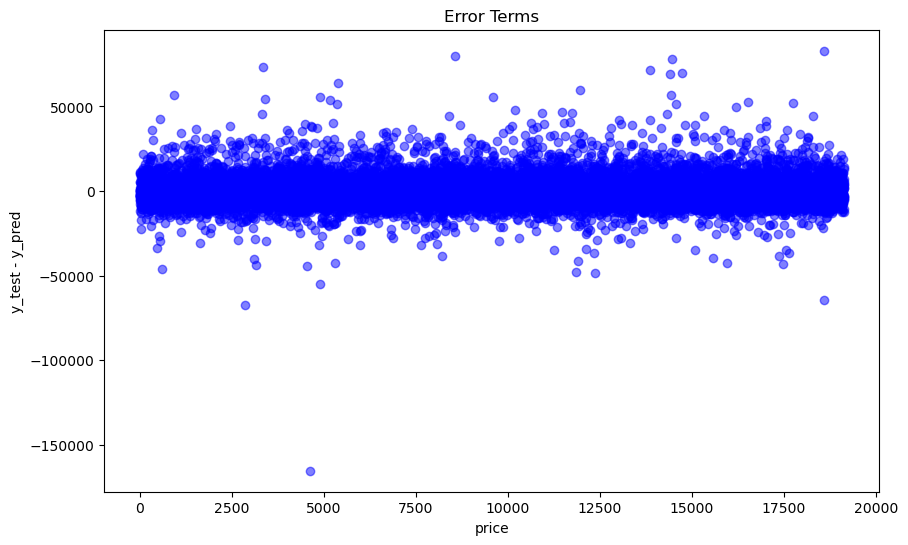

In [56]:
error_terms = y_test_linear - y_pred
plt.figure(figsize=(10, 6))

plt.scatter(range(len(error_terms)), error_terms, color='blue', alpha=0.5)
plt.title('Error Terms')
plt.xlabel('price')
plt.ylabel('y_test - y_pred')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [58]:
r_squared = r2_score(y_test, y_pred)

In [59]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 58132880.83245899
r_square_value : 0.8752232799547065


In [60]:
y_intercept = y_pred[0]

y_intercept

43980.77448114008

# Communicate Results

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
y = data['price']
X = data.drop('price', axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
error_terms = y_test - y_pred

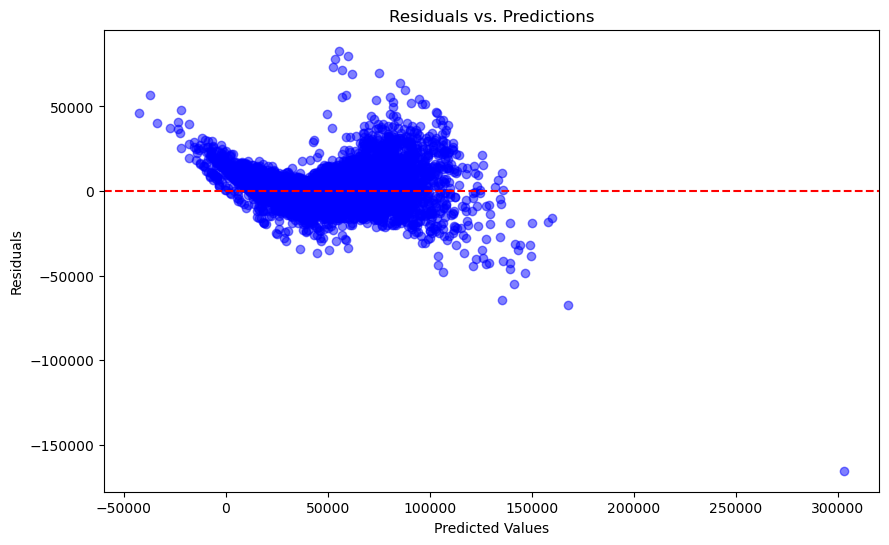

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, error_terms, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


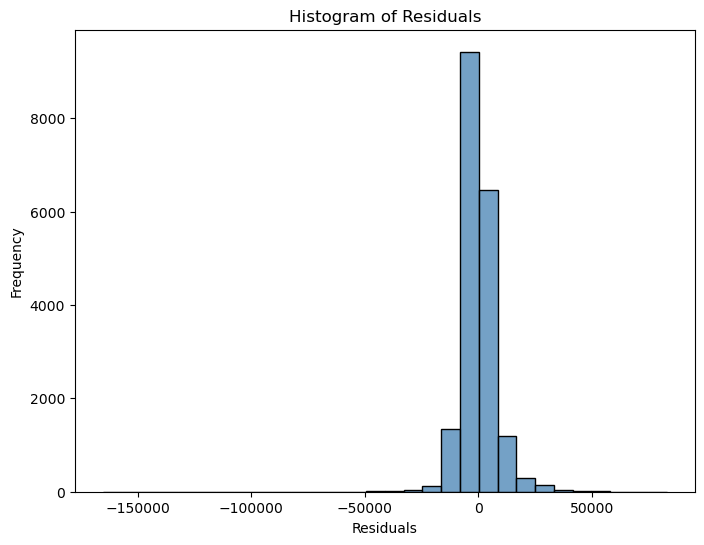

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(error_terms, color='steelblue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [74]:
from scipy.stats import shapiro
shapiro_test_statistic, shapiro_p_value = shapiro(error_terms)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

Shapiro-Wilk Test:
Test Statistic: 0.8758925795555115
p-value: 0.0


C:\Users\monte\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Reject the null hypothesis. The residuals do not follow a normal distribution.

## comparison of models

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [71]:
mse_lr = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_lr = r2_score(y_test, y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

In [72]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Metrics:
Mean Squared Error: 58132880.83245899
R^2 Score: 0.8752232799547065


In [73]:
print("\nRandom Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)


Random Forest Metrics:
Mean Squared Error: 3543839.74527066
R^2 Score: 0.9923934838004085
